In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats as sts
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import pandas_profiling
%matplotlib inline

# 1.Загрузка файла hr.csv.

In [ ]:
# 1.1 Загрузка файла hr.csv
# 1.2 Общие сведения о дата-сете

**1.1 Загрузка файла hr.csv**

In [2]:
# 1.Загрузка файла hr.csv.

file="HR.csv"
df=pd.read_csv(file)
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

**1.2 Общие сведения о дата-сете**

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [4]:
# Проверка на выбросы и нулевые значения

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
# Проверка на выбросы и нулевые значения (2)

print('Кол-во нулевых значений satisfaction_level: ',df['satisfaction_level'].isnull().sum())
print('Кол-во нулевых значений last_evaluation: ',df['last_evaluation'].isnull().sum())
print('Кол-во нулевых значений number_project: ',df['number_project'].isnull().sum())
print('Кол-во нулевых значений average_montly_hours: ',df['average_montly_hours'].isnull().sum())
print('Кол-во нулевых значений time_spend_company: ',df['time_spend_company'].isnull().sum())
print('Кол-во нулевых значений Work_accident: ',df['Work_accident'].isnull().sum())
print('Кол-во нулевых значений left: ',df['left'].isnull().sum())
print('Кол-во нулевых значений promotion_last_5years: ',df['promotion_last_5years'].isnull().sum())
print('Кол-во нулевых значений sales: ',df['sales'].isnull().sum())
print('Кол-во нулевых значений salary: ',df['salary'].isnull().sum())

Кол-во нулевых значений satisfaction_level:  0
Кол-во нулевых значений last_evaluation:  0
Кол-во нулевых значений number_project:  0
Кол-во нулевых значений average_montly_hours:  0
Кол-во нулевых значений time_spend_company:  0
Кол-во нулевых значений Work_accident:  0
Кол-во нулевых значений left:  0
Кол-во нулевых значений promotion_last_5years:  0
Кол-во нулевых значений sales:  0
Кол-во нулевых значений salary:  0


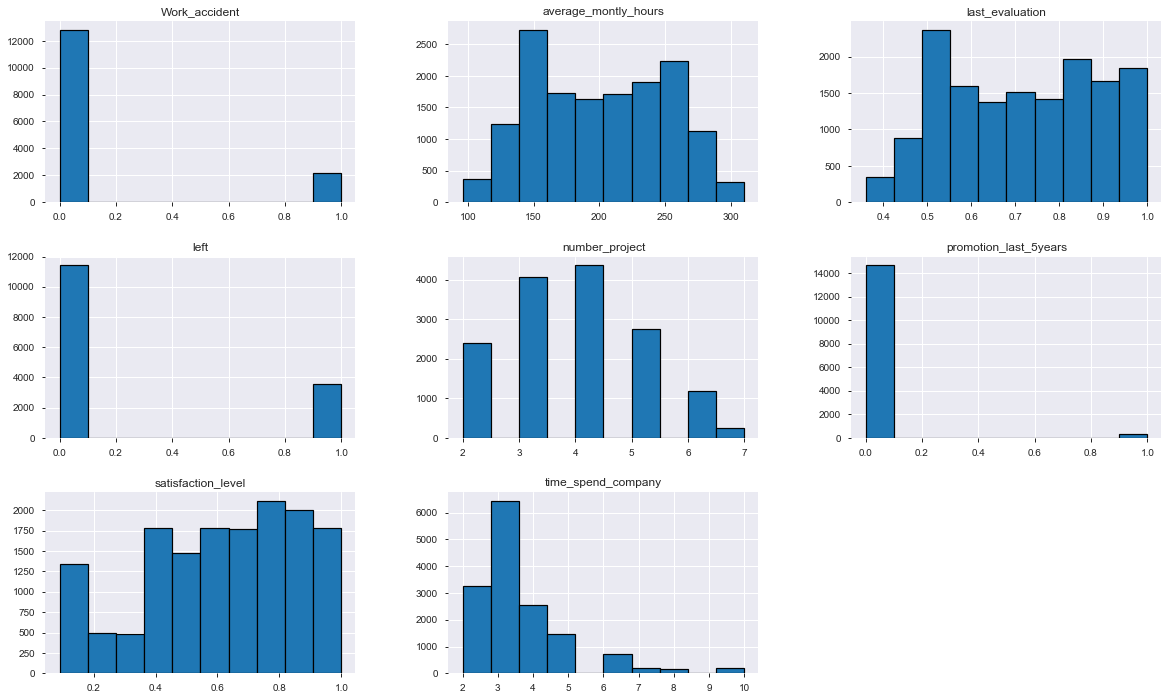

In [6]:
# Виды распределений основных показателей дата-сета

df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [7]:
# Уникальные значения параметров дата-сета

# print('Уникальные значения satisfaction_level: ',pd.unique(df['satisfaction_level']))
# print('Уникальные значения last_evaluation: ',pd.unique(df['last_evaluation']))
print('Уникальные значения number_project: ',pd.unique(df['number_project']))
# print('Уникальные значения average_montly_hours: ',pd.unique(df['average_montly_hours']))
print('Уникальные значения time_spend_company: ',pd.unique(df['time_spend_company']))
print('Уникальные значения Work_accident: ',pd.unique(df['Work_accident']))
print('Уникальные значения left: ',pd.unique(df['left']))
print('Уникальные значения promotion_last_5years: ',pd.unique(df['promotion_last_5years']))
print('Уникальные значения sales: ',pd.unique(df['sales']))
print('Уникальные значения salary: ',pd.unique(df['salary']))

Уникальные значения number_project:  [2 5 7 6 4 3]
Уникальные значения time_spend_company:  [ 3  6  4  5  2  8 10  7]
Уникальные значения Work_accident:  [0 1]
Уникальные значения left:  [1 0]
Уникальные значения promotion_last_5years:  [0 1]
Уникальные значения sales:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Уникальные значения salary:  ['low' 'medium' 'high']


In [8]:
df.profile_report()

**Общие выводы по дата-сету.**

1. Дата-сет состоит из 10 колонок и 14999 строк.
2. В данных отсутствуют выбросы и нулевые значения.
3. Данные в дата-сете представлены следующими типами значений:
    int (шесть переменных);
    float (две переменные - satisfaction_level и last_evaluation);
    object (две переменные - sales и salary).
4. Переменные sales и salary являются категориальными переменными.
5. Переменные Work_accident, left, promotion_last_5years - имеют булево значение.

# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [ ]:
# 2. Рассчитать основные статистики для переменных:
# 2.1 Среднее
# 2.2 Медиана
# 2.3 Мода
# 2.4 Минимум
# 2.5 Максимум
# 2.6 Сред. отклонение

In [9]:
# Основные статистики для всех переменных

df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

**2.1 Среднее**

In [10]:
# 2.1 Среднее

df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [11]:
# 2.1 Среднее (2)

print('Среднее значение satisfaction_level: ', statistics.mean(df['satisfaction_level']))
print('Среднее значение last_evaluation: ', statistics.mean(df['last_evaluation']))
print('Среднее значение number_project: ', statistics.mean(df['number_project']))
print('Среднее значение average_montly_hours: ', statistics.mean(df['average_montly_hours']))
print('Среднее значение time_spend_company: ', statistics.mean(df['time_spend_company']))
print('Среднее значение Work_accident: ', statistics.mean(df['Work_accident']))
print('Среднее значение left: ', statistics.mean(df['left']))
print('Среднее значение promotion_last_5years: ', statistics.mean(df['promotion_last_5years']))

Среднее значение satisfaction_level:  0.6128335222348157
Среднее значение last_evaluation:  0.7161017401160077
Среднее значение number_project:  3.80305353690246
Среднее значение average_montly_hours:  201.0503366891126
Среднее значение time_spend_company:  3.498233215547703
Среднее значение Work_accident:  0.1446096406427095
Среднее значение left:  0.2380825388359224
Среднее значение promotion_last_5years:  0.021268084538969265


**2.2 Медиана**

In [12]:
# 2.2 Медиана

df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [13]:
# 2.2 Медиана (2)

print('Медиана satisfaction_level: ', statistics.median(df['satisfaction_level']))
print('Среднее значение last_evaluation: ', statistics.median(df['last_evaluation']))
print('Среднее значение number_project: ', statistics.median(df['number_project']))
print('Среднее значение average_montly_hours: ', statistics.median(df['average_montly_hours']))
print('Среднее значение time_spend_company: ', statistics.median(df['time_spend_company']))
print('Среднее значение Work_accident: ', statistics.median(df['Work_accident']))
print('Среднее значение left: ', statistics.median(df['left']))
print('Среднее значение promotion_last_5years: ', statistics.median(df['promotion_last_5years']))

Медиана satisfaction_level:  0.64
Среднее значение last_evaluation:  0.72
Среднее значение number_project:  4
Среднее значение average_montly_hours:  200
Среднее значение time_spend_company:  3
Среднее значение Work_accident:  0
Среднее значение left:  0
Среднее значение promotion_last_5years:  0


**2.3 Мода**

In [14]:
# 2.3 Мода

df.mode()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0   0.0                    0.0  sales   
1                 NaN            NaN   NaN                    NaN    NaN   

  salary  
0    low  
1    NaN

In [15]:
# 2.3 Мода (2)

print('Мода satisfaction_level: ', statistics.mode(df['satisfaction_level']))
print('Мода last_evaluation: ', statistics.mode(df['last_evaluation']))
print('Среднее значение number_project: ', statistics.mode(df['number_project']))
print('Мода time_spend_company: ', statistics.mode(df['time_spend_company']))
print('Среднее значение Work_accident: ', statistics.mode(df['Work_accident']))
print('Среднее значение left: ', statistics.mode(df['left']))
print('Среднее значение promotion_last_5years: ', statistics.mode(df['promotion_last_5years']))

# average_montly_hours=AMH
AMH = df['average_montly_hours']
AMH_counts = {}
for p in AMH:
    if p not in AMH_counts:
        AMH_counts[p] = 1
    else:
        AMH_counts[p] += 1

maxp = 0
mode_AMH = None
for k, v in AMH_counts.items():
    if maxp < v:
        maxp = v
        mode_AMH = k
print('Мода average_montly_hours: ', mode_AMH)

Мода satisfaction_level:  0.1
Мода last_evaluation:  0.55
Среднее значение number_project:  4
Мода time_spend_company:  3
Среднее значение Work_accident:  0
Среднее значение left:  0
Среднее значение promotion_last_5years:  0
Мода average_montly_hours:  135


**2.4 Минимум**

In [16]:
# 2.4 Минимум

df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [17]:
# 2.4 Минимум

print('Минимум satisfaction_level: ', min(df['satisfaction_level']))
print('Минимум last_evaluation: ', min(df['last_evaluation']))
print('Минимум number_project: ', min(df['number_project']))
print('Минимум average_montly_hours: ', min(df['average_montly_hours']))
print('Минимум time_spend_company: ', min(df['time_spend_company']))
print('Минимум Work_accident: ', min(df['Work_accident']))
print('Минимум left: ', min(df['left']))
print('Минимум promotion_last_5years: ', min(df['promotion_last_5years']))

Минимум satisfaction_level:  0.09
Минимум last_evaluation:  0.36
Минимум number_project:  2
Минимум average_montly_hours:  96
Минимум time_spend_company:  2
Минимум Work_accident:  0
Минимум left:  0
Минимум promotion_last_5years:  0


**2.5 Максимум**

In [18]:
# 2.4 Максимум

df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [19]:
# 2.5 Максимум

print('Максимум satisfaction_level: ', max(df['satisfaction_level']))
print('Максимум last_evaluation: ', max(df['last_evaluation']))
print('Минимум number_project: ', max(df['number_project']))
print('Максимум average_montly_hours: ', max(df['average_montly_hours']))
print('Максимум time_spend_company: ', max(df['time_spend_company']))
print('Минимум Work_accident: ', max(df['Work_accident']))
print('Минимум left: ', max(df['left']))
print('Минимум promotion_last_5years: ', max(df['promotion_last_5years']))

Максимум satisfaction_level:  1.0
Максимум last_evaluation:  1.0
Минимум number_project:  7
Максимум average_montly_hours:  310
Максимум time_spend_company:  10
Минимум Work_accident:  1
Минимум left:  1
Минимум promotion_last_5years:  1


**2.6 Сред. отклонение**

In [20]:
# 2.6 Сред. отклонение

print('Сред. отклонение satisfaction_level: ', statistics.pstdev(df['satisfaction_level']))
print('Сред. отклонение last_evaluation: ', statistics.pstdev(df['last_evaluation']))
print('Сред. отклонение number_project: ', statistics.pstdev(df['number_project']))
print('Сред. отклонение average_montly_hours: ', statistics.pstdev(df['average_montly_hours']))
print('Сред. отклонение time_spend_company: ', statistics.pstdev(df['time_spend_company']))
print('Среднее значение Work_accident: ', statistics.pstdev(df['Work_accident']))
print('Среднее значение left: ', statistics.pstdev(df['left']))
print('Среднее значение promotion_last_5years: ', statistics.pstdev(df['promotion_last_5years']))

Сред. отклонение satisfaction_level:  0.2486223626820733
Сред. отклонение last_evaluation:  0.1711634045107436
Сред. отклонение number_project:  1.2325512654823438
Сред. отклонение average_montly_hours:  49.94143446256218
Сред. отклонение time_spend_company:  1.4600875552715114
Среднее значение Work_accident:  0.3517068274513532
Среднее значение left:  0.42590990072709495
Среднее значение promotion_last_5years:  0.14427665479561314


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

**Матрица корреляций**

In [21]:
df.corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   

                       Work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_montly_hours       -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
Work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

**Визуализация матрицы корреляций с помощью heatmap**

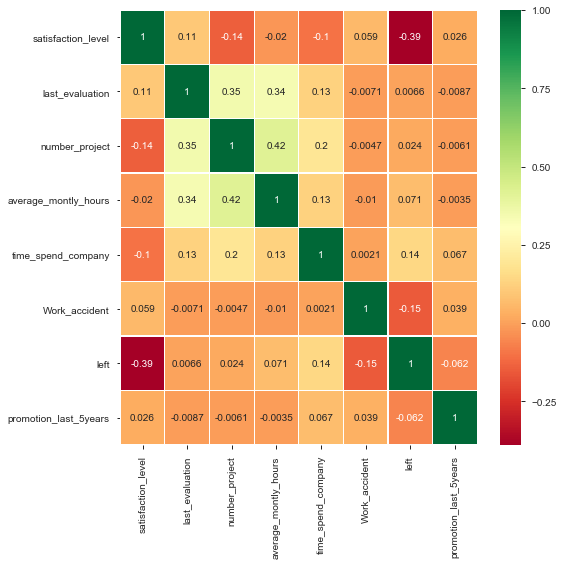

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

# 4.Визуализировать несколько взаимосвязей между переменными.

**Визуализация взаимосвязей с помощью метода pairplot**.

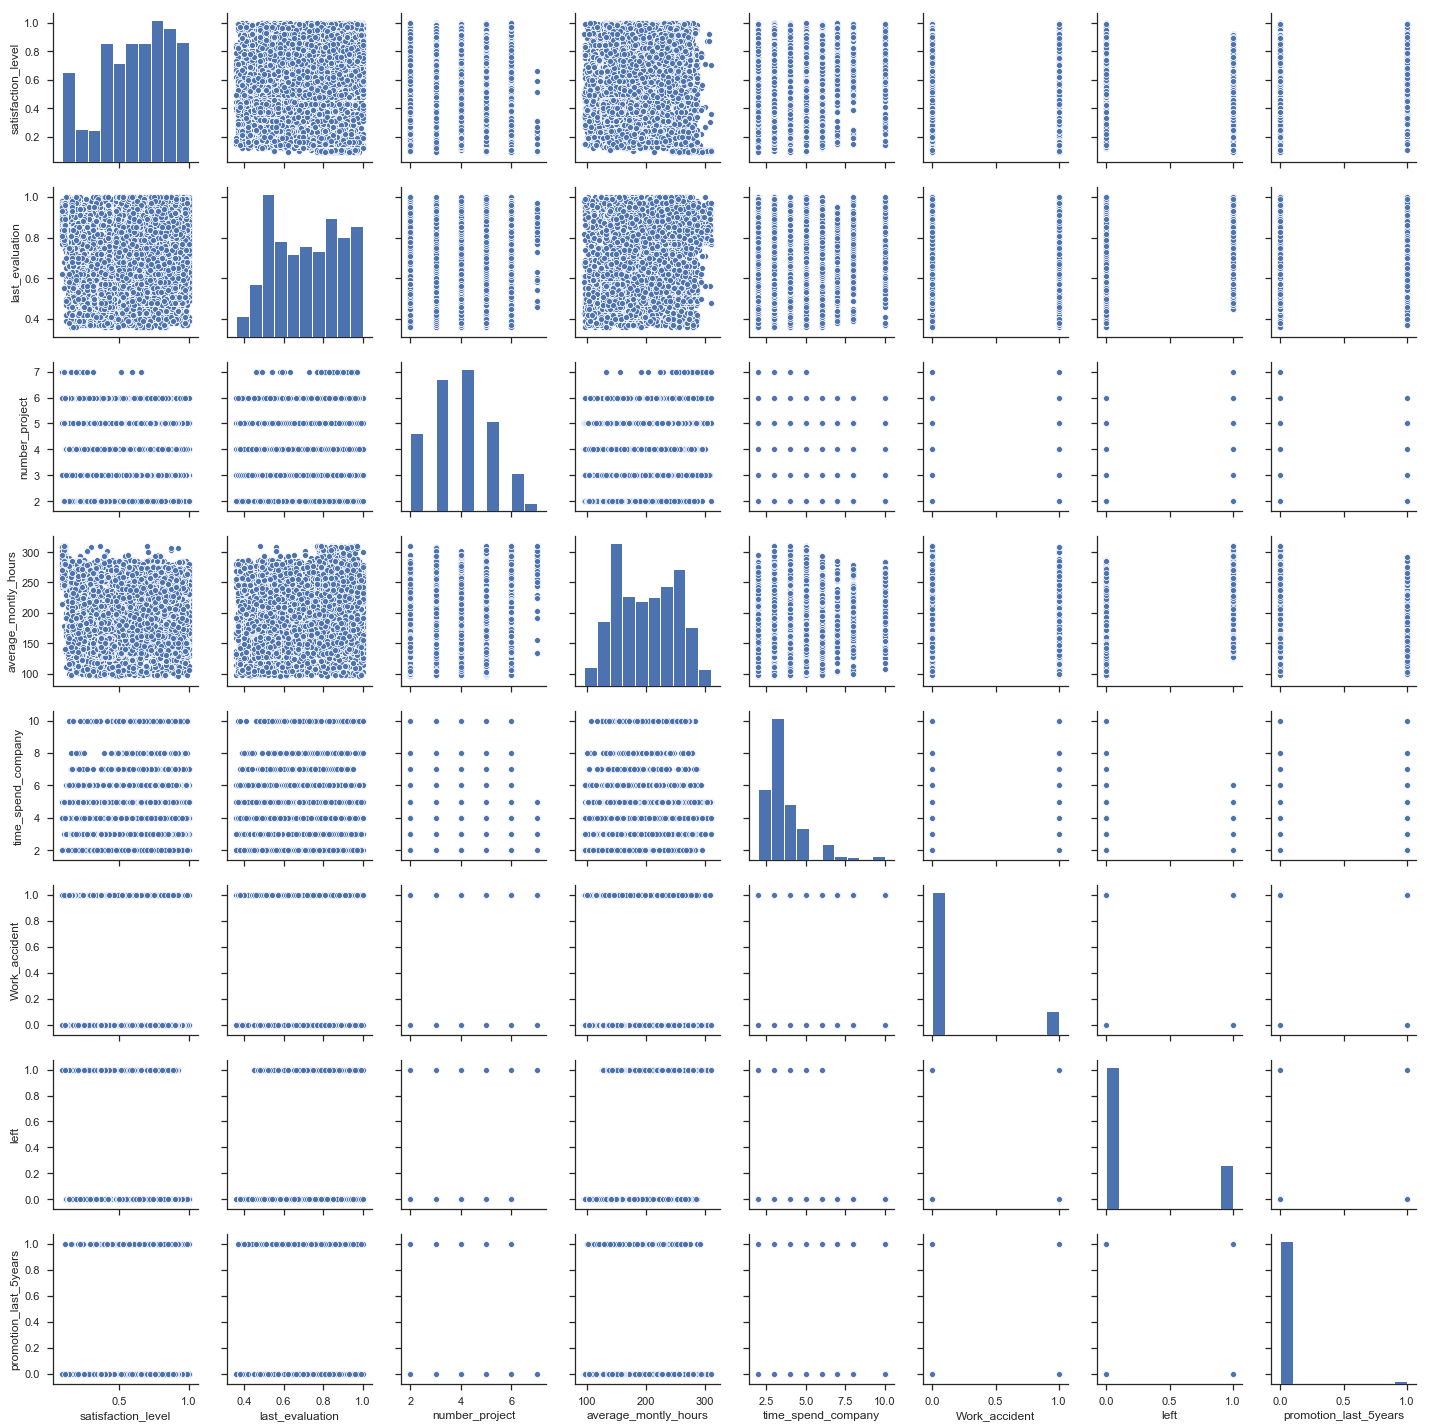

In [23]:
sns.set(style="ticks", color_codes=True)
i = sns.pairplot(df)

**Визуализация с классификационным анализом всех выборок попарно с помощью параметра hue, по классам "sales":**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


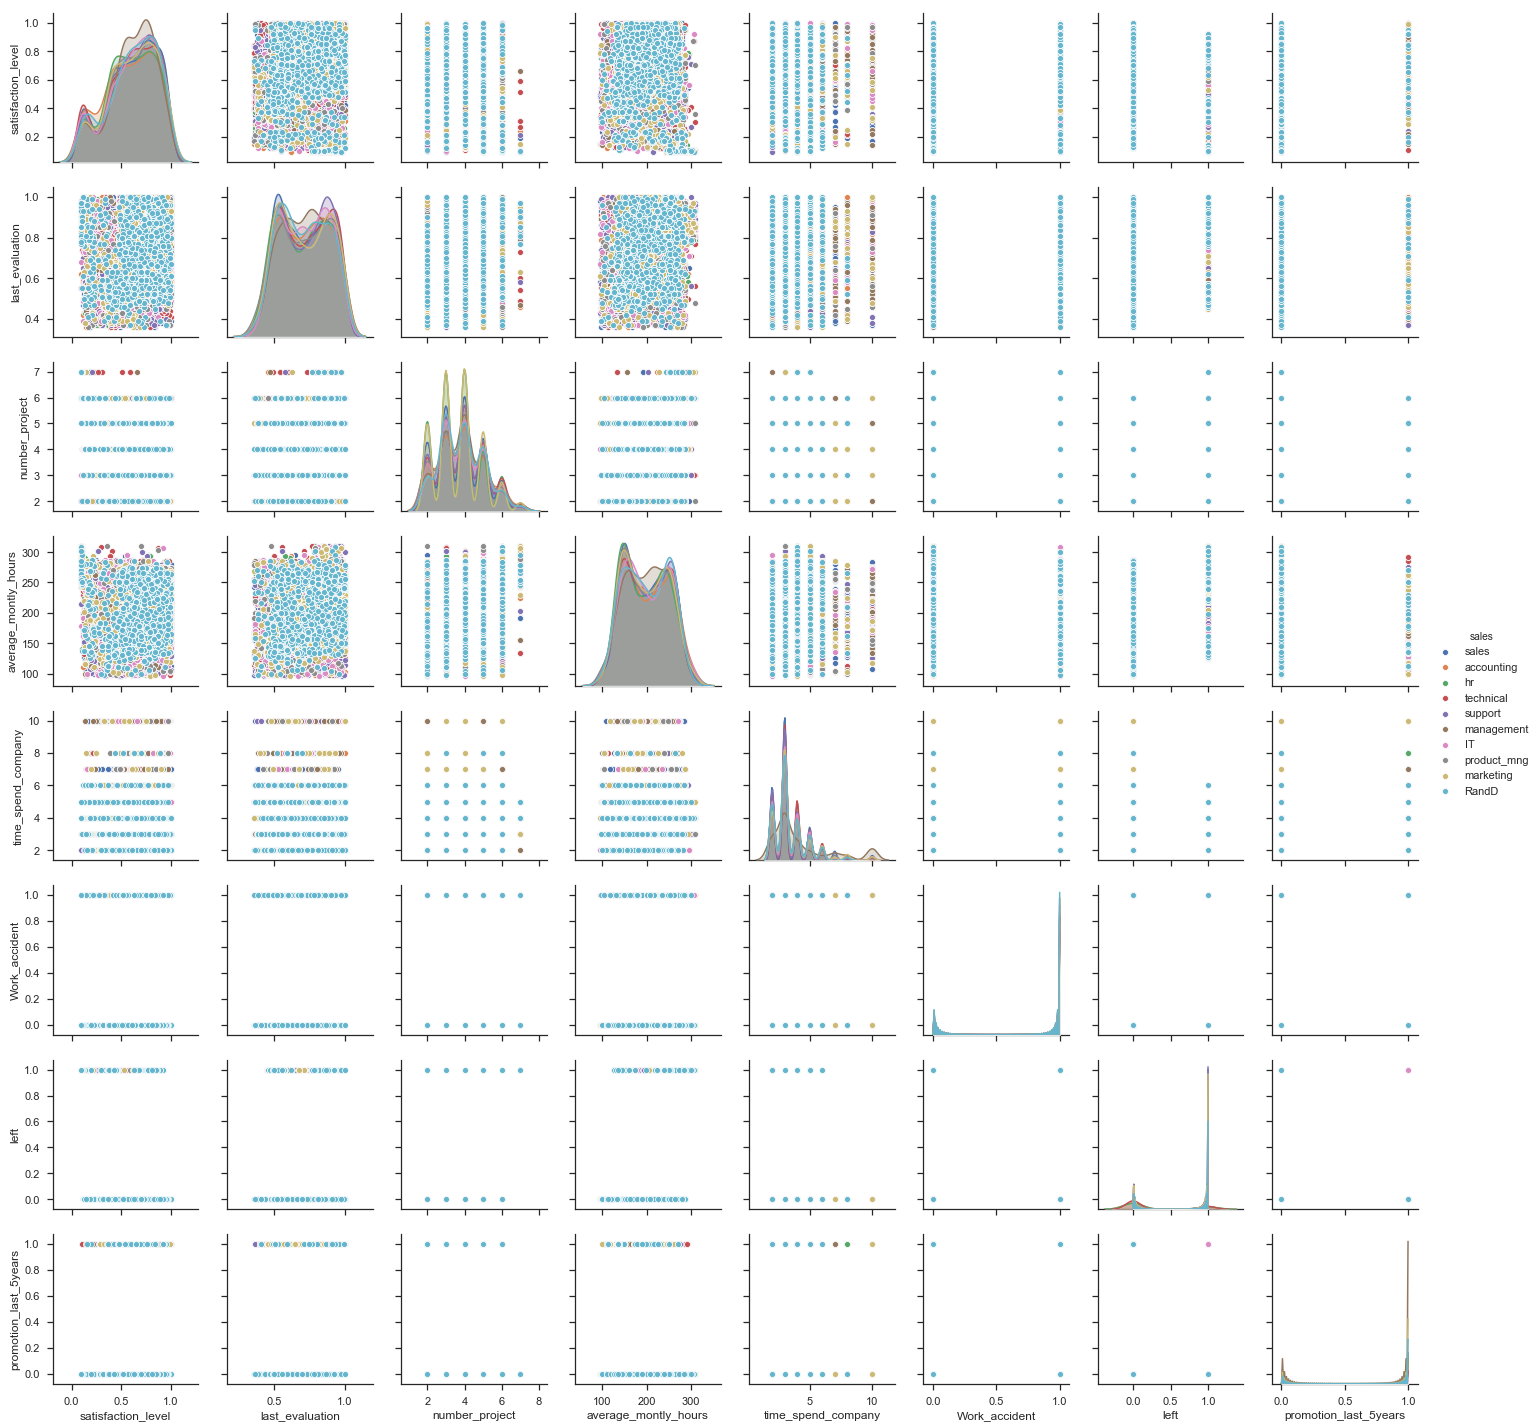

In [24]:
fig = sns.pairplot(data=df, hue='sales')
plt.show()

**Визуализация с классификационным анализом всех выборок попарно с помощью параметра hue, по классам "salary":**

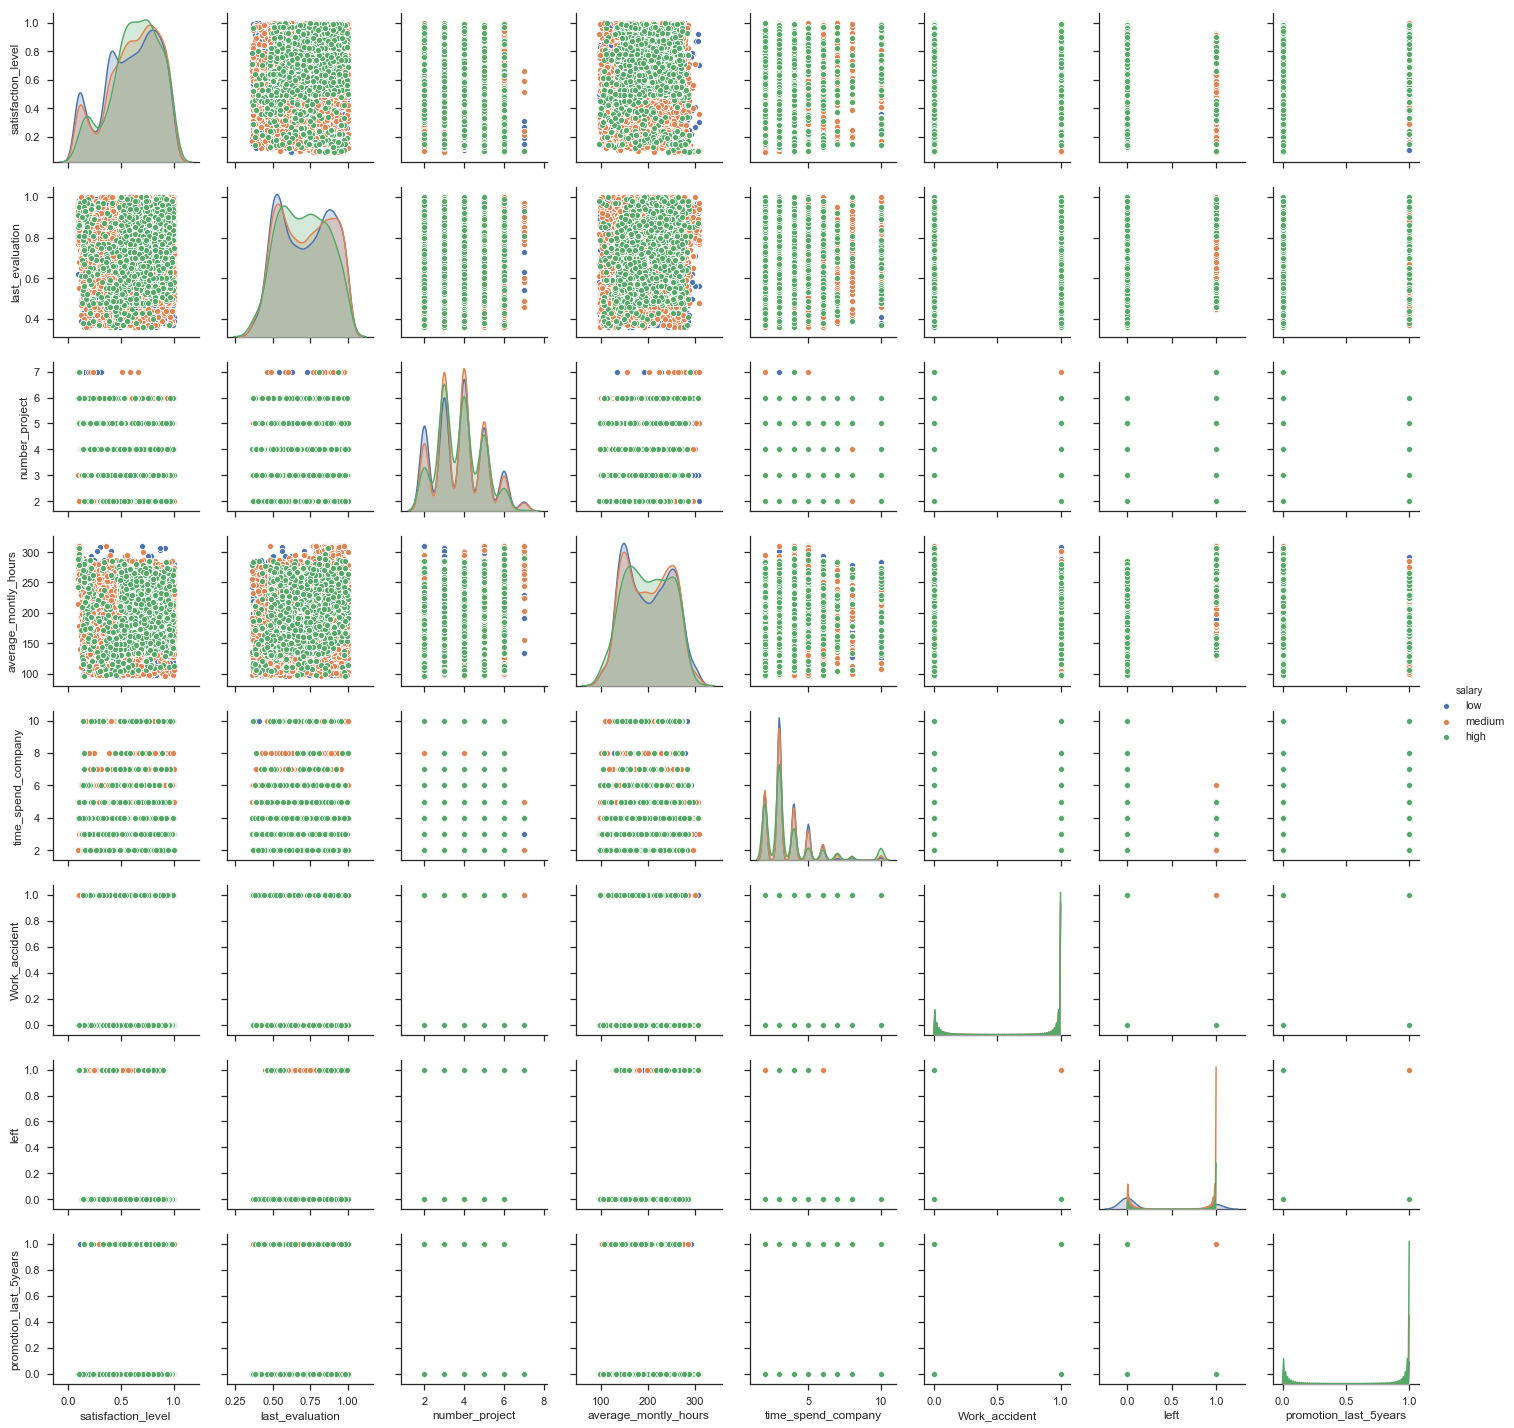

In [25]:
fig = sns.pairplot(data=df, hue='salary')
plt.show()

**Визуализация с классификационным анализом всех выборок попарно с помощью параметра hue, по классам "left":**

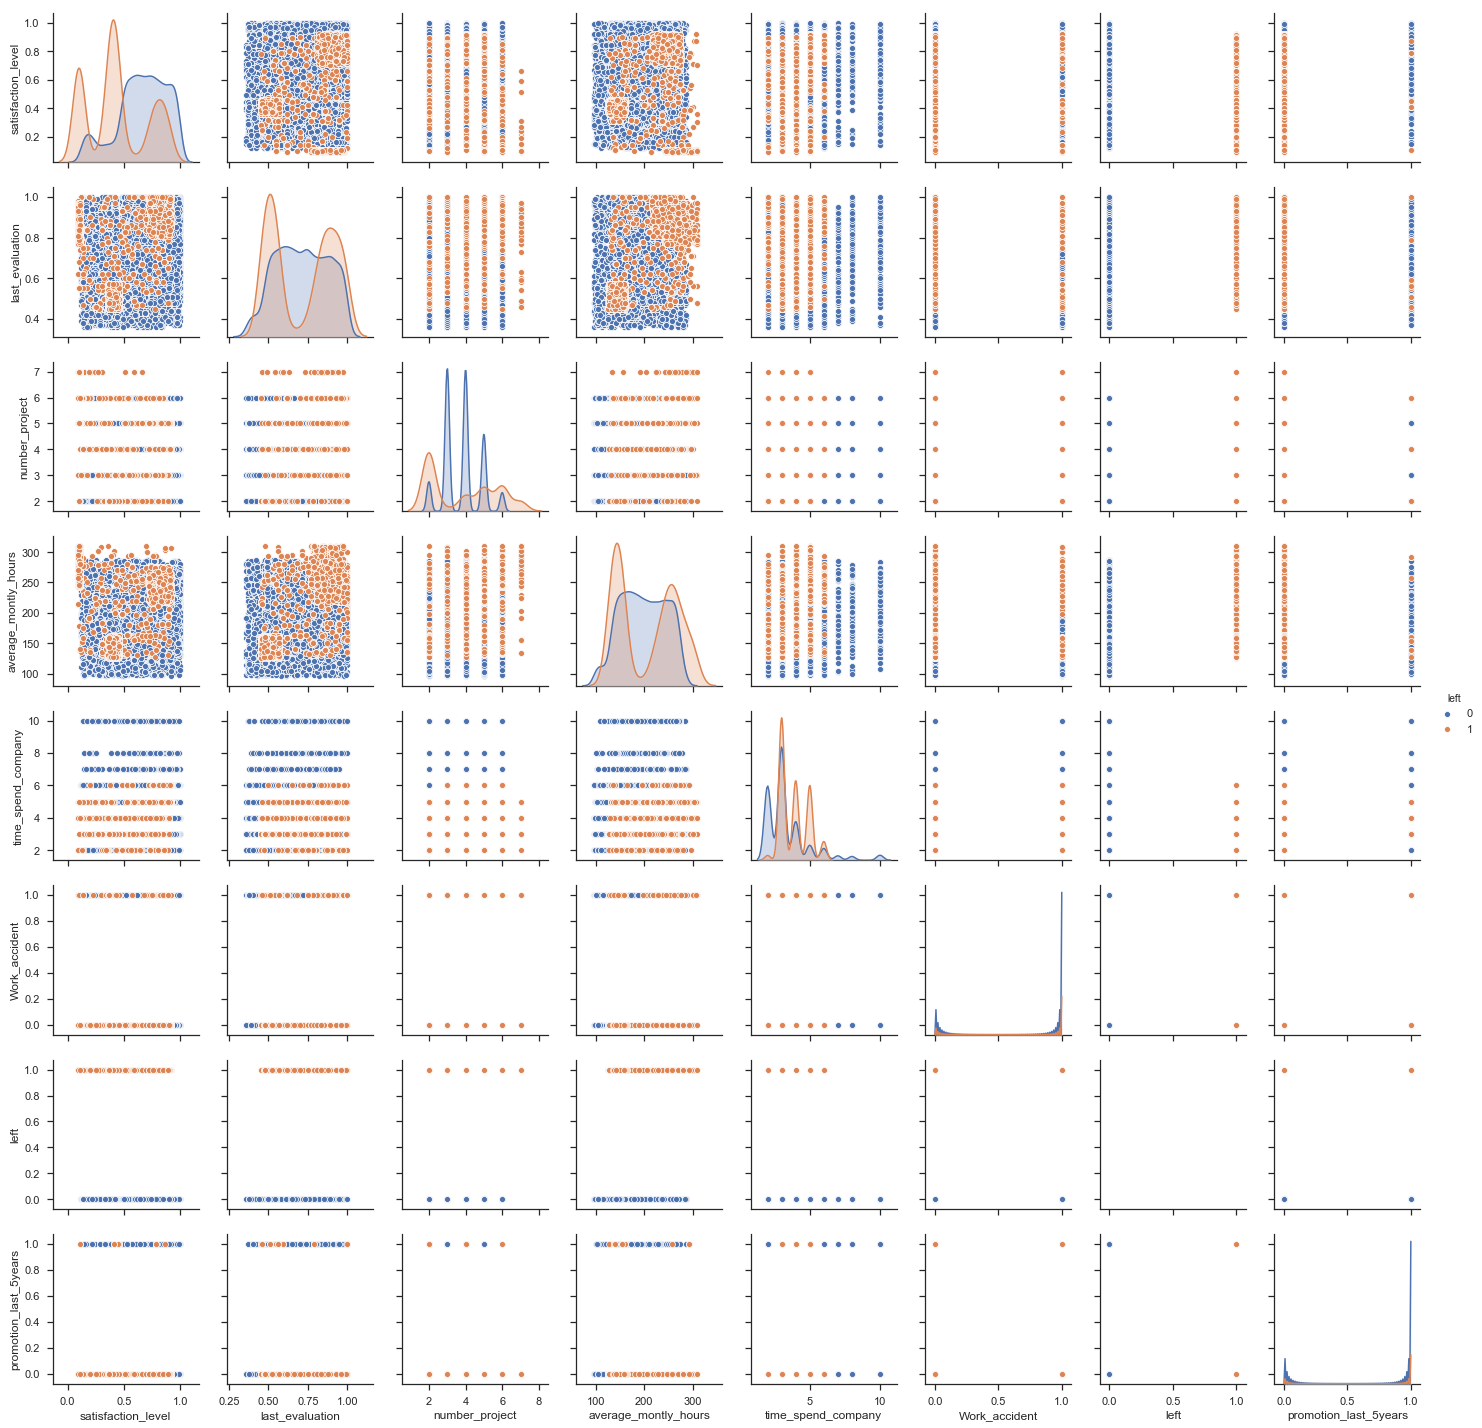

In [26]:
fig = sns.pairplot(data=df, hue='left')
plt.show()

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

**Одновыборочный t-критерий**

Тестирование  по показателю satisfaction_level

In [27]:
yes_left_satifaction = df[df['left']==1]['satisfaction_level']

sts.ttest_1samp(yes_left_satifaction, df['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

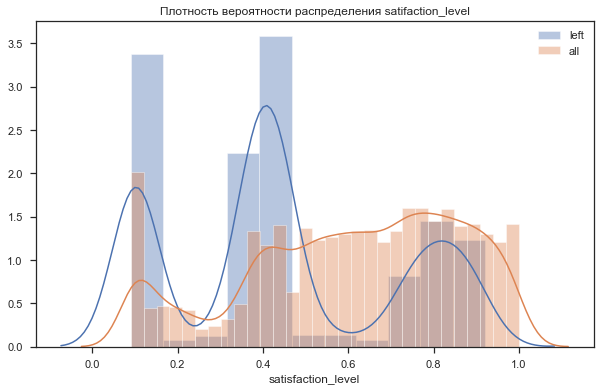

In [28]:
yes_left_satifaction = df[df['left']==1]['satisfaction_level']
satifaction_level = df['satisfaction_level']
plt.figure(figsize=(10,6))
sns.distplot(yes_left_satifaction)
sns.distplot(satifaction_level)
plt.title('Плотность вероятности распределения satifaction_level')
plt.legend(['left', 'all'])
plt.show()

*T-значение -39.10, p-value значительно меньше 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем удовлетворенности сотрудников ушедших из компании и генеральной совокупности в целом.*

**Двухвыборочный t-критерий для независимых выборок**

Тестирование по показателю satisfaction_level между группами ушедших и оставшихся в компании сотрудников.

In [29]:
no_left_satifaction = df[df['left']==0]['satisfaction_level']
left_satifaction = df[df['left']==1]['satisfaction_level']

sts.ttest_ind(no_left_satifaction, left_satifaction)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

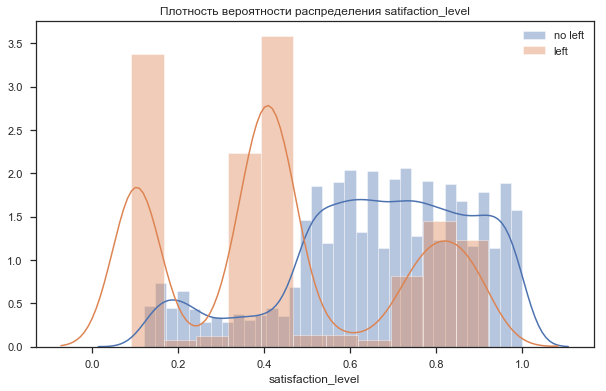

In [30]:
no_left_satifaction = df[df['left']==0]['satisfaction_level']
left_satifaction = df[df['left']==1]['satisfaction_level']
plt.figure(figsize=(10,6))
sns.distplot(no_left_satifaction)
sns.distplot(left_satifaction)
plt.title('Плотность вероятности распределения satifaction_level')
plt.legend(['no left', 'left'])
plt.show()

In [31]:
len(no_left_satifaction), len(left_satifaction)

(11428, 3571)

In [32]:
no_left_satifaction = no_left_satifaction.sample(n=3571, replace=True)
left_satifaction = left_satifaction.sample(n=3571, replace=True)

sts.ttest_ind(no_left_satifaction, left_satifaction)

Ttest_indResult(statistic=39.4944686793499, pvalue=1.0004984380731434e-308)

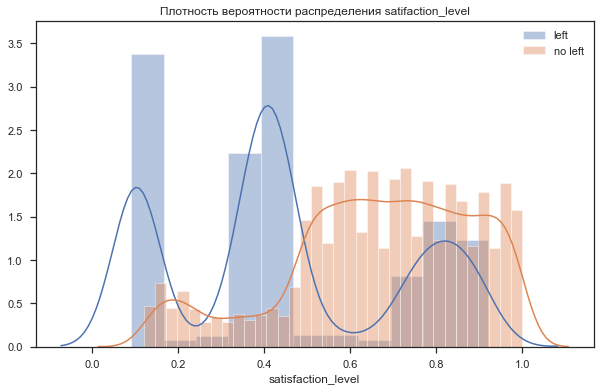

In [33]:
left_satifaction = df[df['left']==1]['satisfaction_level']
no_left_satifaction = df[df['left']==0]['satisfaction_level']
plt.figure(figsize=(10,6))
sns.distplot(left_satifaction)
sns.distplot(no_left_satifaction)
plt.title('Плотность вероятности распределения satifaction_level')
plt.legend(['left', 'no left'])
plt.show()

*T-значение 41.00, p-value значительно меньше 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем удовлетворенности сотрудников ушедших из компании и оставшихся в компании.*

Проверка выборок ушедшие из компании и группа заработной платы low

In [34]:
low_salary = df[df['salary']=='low'] ['satisfaction_level']
left = df[df['left']==1]['satisfaction_level']

sts.ttest_ind(low_salary, left)

Ttest_indResult(statistic=30.539895852313194, pvalue=1.304702155568221e-196)

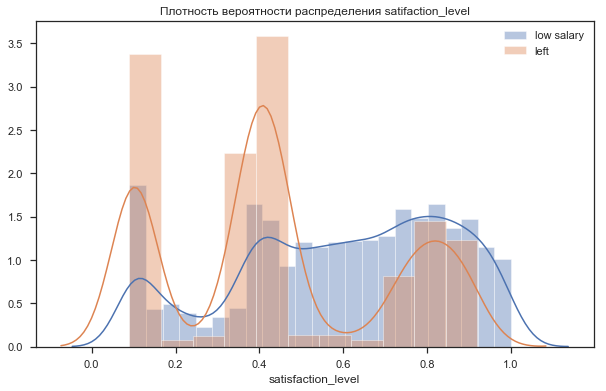

In [35]:
low_salary = df[df['salary']=='low'] ['satisfaction_level']
left = df[df['left']==1]['satisfaction_level']
plt.figure(figsize=(10,6))
sns.distplot(low_salary)
sns.distplot(left)
plt.title('Плотность вероятности распределения satifaction_level')
plt.legend(['low salary', 'left'])
plt.show()

*T-значение 30.54, p-value 0.00, что также значительно меньше 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем удовлетворенности сотрудников ушедших из компании и сотрудников имеющих нихкий уровень заработной платы.*

# Множественный тест (ANOVA)

Тестирование по группам заработной платы среди ушедших из компании

In [36]:
high_salary1 = df[df['salary']=='high'] [df['left']==1] ['satisfaction_level']
medium_salary1 = df[df['salary']=='medium'] [df['left']==1] ['satisfaction_level']
low_salary1 = df[df['salary']=='low'] [df['left']==1] ['satisfaction_level']

sts.f_oneway(low_salary1, medium_salary1, high_salary1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


F_onewayResult(statistic=0.061598172163621914, pvalue=0.9402616336706896)

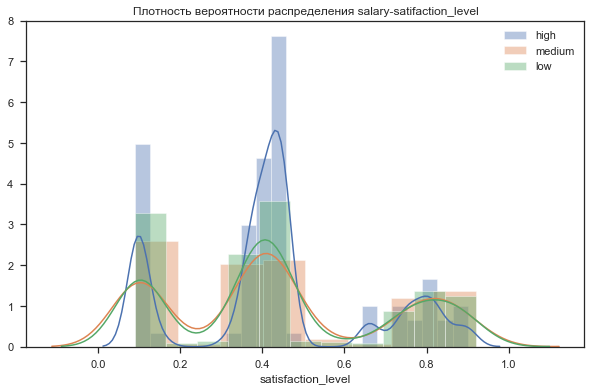

In [37]:
plt.figure(figsize=(10,6))
sns.distplot(high_salary1)
sns.distplot(medium_salary1)
sns.distplot(low_salary1)
plt.title('Плотность вероятности распределения salary-satifaction_level')
plt.legend(['high', 'medium', 'low'])
plt.show()

In [38]:
len(low_salary1), len(medium_salary1), len(high_salary1)

(2172, 1317, 82)

In [39]:
low_salary1 = low_salary1.sample(n=82, replace=True)
medium_salary1 = medium_salary1.sample(n=82, replace=True)
high_salary1 = high_salary1.sample(n=82, replace=True)

sts.f_oneway(low_salary1, medium_salary1, high_salary1)

F_onewayResult(statistic=0.12250363864626021, pvalue=0.884757288081685)

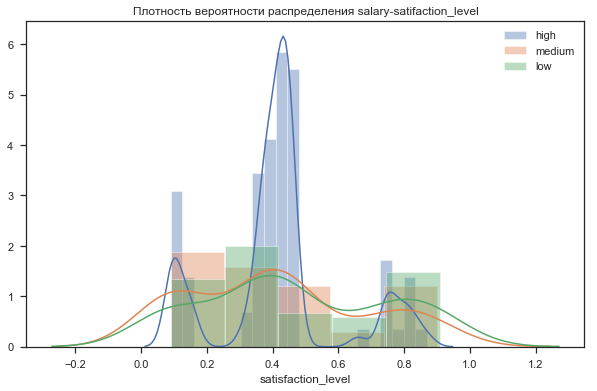

In [119]:
plt.figure(figsize=(10,6))
sns.distplot(high_salary1)
sns.distplot(medium_salary1)
sns.distplot(low_salary1)
plt.title('Плотность вероятности распределения salary-satifaction_level')
plt.legend(['high', 'medium', 'low'])
plt.show()

*T-значение 0.84, p-value 0.43, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистического различия между уровнем удовлетворенности сотрудников ушедших из компании разделенных по группам заработной платы.*

# Критерий Манна-Уитни

*Тестрировани  по показателю satisfaction_level*

Учитывая, что данные по по показателю уровня удовлетворенности сотрудников имеют не нормальное распределение следует провести тестирование по критерию Манна-Уитни (Критерий Уилкоксона) 

In [40]:
no_left_satifaction = df[df['left']==0]['satisfaction_level']
left_satifaction = df[df['left']==1]['satisfaction_level']

u, p_value = sts.mannwhitneyu(no_left_satifaction,left_satifaction)
print("no_left и  left wilcoxon-test", p_value)

no_left и  left wilcoxon-test 0.0


Критерий Манна-Уитни по выборкам сотрудников покинувших и оставшихся в компании по уровню удовлетворенности показывает, что данные выборки имеют статистическое отличие.

Тестирование по группам заработной платы (между группой low и группами high-medium)

In [41]:
high_salary = df[df['salary']=='high']['satisfaction_level']
medium_salary = df[df['salary']=='medium']['satisfaction_level']
low_salary = df[df['salary']=='low']['satisfaction_level']
high_medium_salary = df[df['salary']!='low']['satisfaction_level']

u, p_value = sts.mannwhitneyu(high_salary, medium_salary)
print("high-medium_salary wilcoxon-test", p_value)
u, p_value = sts.mannwhitneyu(high_salary, low_salary)
print("high-low_salary wilcoxon-test", p_value)
u, p_value = sts.mannwhitneyu(medium_salary, low_salary)
print("medium-low_salary wilcoxon-test", p_value)
u, p_value = sts.mannwhitneyu(high_medium_salary, low_salary)
print("high & medium-low_salary wilcoxon-test", p_value)

high-medium_salary wilcoxon-test 0.06434673160074922
high-low_salary wilcoxon-test 1.3117365702204594e-05
medium-low_salary wilcoxon-test 1.853786404337302e-06
high & medium-low_salary wilcoxon-test 4.8141554792862535e-08


Тестирование по Критерию Манна-Уитни по выборкам групп заработной платы по показателю уровня удовлетворенности показало,что что выборки high и medium не имеют статистического отличия между собой, а выборка low имеете статистическое отличие от выборок групп заработной платы high и medium.

# 6.Рассчитать сколько работников работает в каждом департаменте.

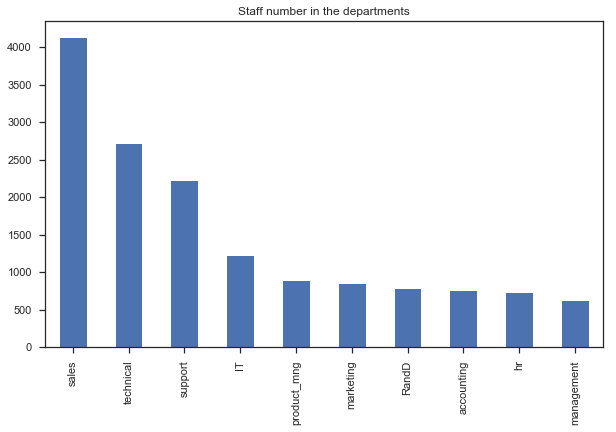

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [42]:
plt.figure(figsize=(10,6))
df['sales'].value_counts().plot(kind='bar', label='Sales')
plt.title('Staff number in the departments')
plt.show();
df['sales'].value_counts()

# 7.Показать распределение сотрудников по зарплатам.

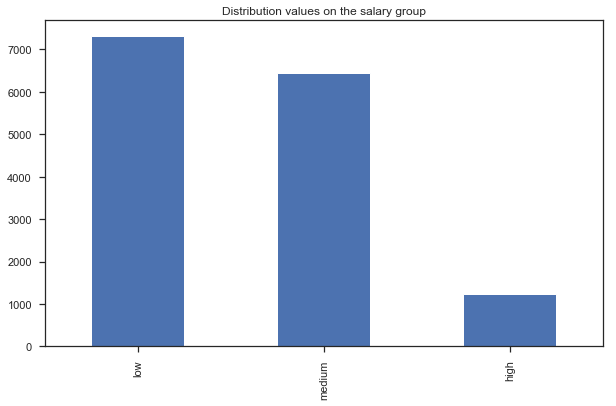

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [43]:
# 2.7 Распределение сотрудников по группам заработной платы

plt.figure(figsize=(10,6))
df['salary'].value_counts().plot(kind='bar', label='Salary')
plt.title('Distribution values on the salary group')
plt.show();
df['salary'].value_counts()

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

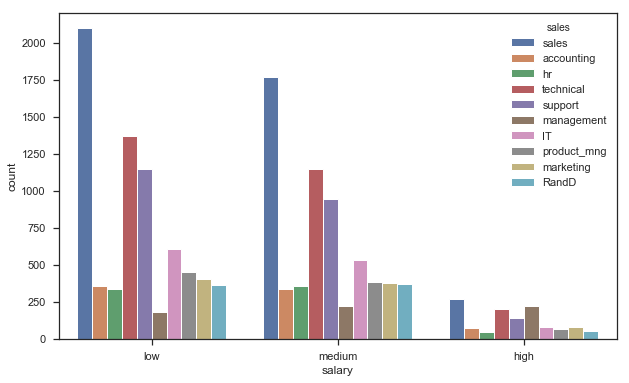

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x="salary", hue='sales', data=df);
plt.show()

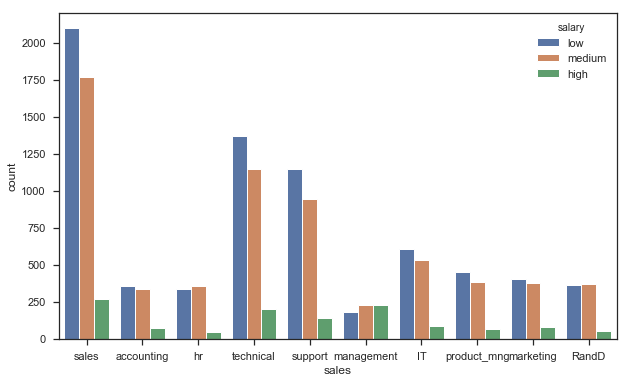

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x="sales", hue='salary', data=df);
plt.show()

In [46]:
# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.
pd.crosstab(df['sales'], df['salary'])

salary       high   low  medium
sales                          
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147

# 9.Сколько сотрудников покинули компанию.

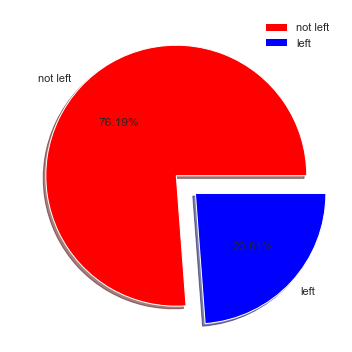

0    11428
1     3571
Name: left, dtype: int64

In [47]:
size = list(df['left'].value_counts())
colors = ['red', 'blue']
labels = "not left", "left"
explode = [0, 0.2]

plt.figure(figsize=(10,6))
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

df['left'].value_counts()

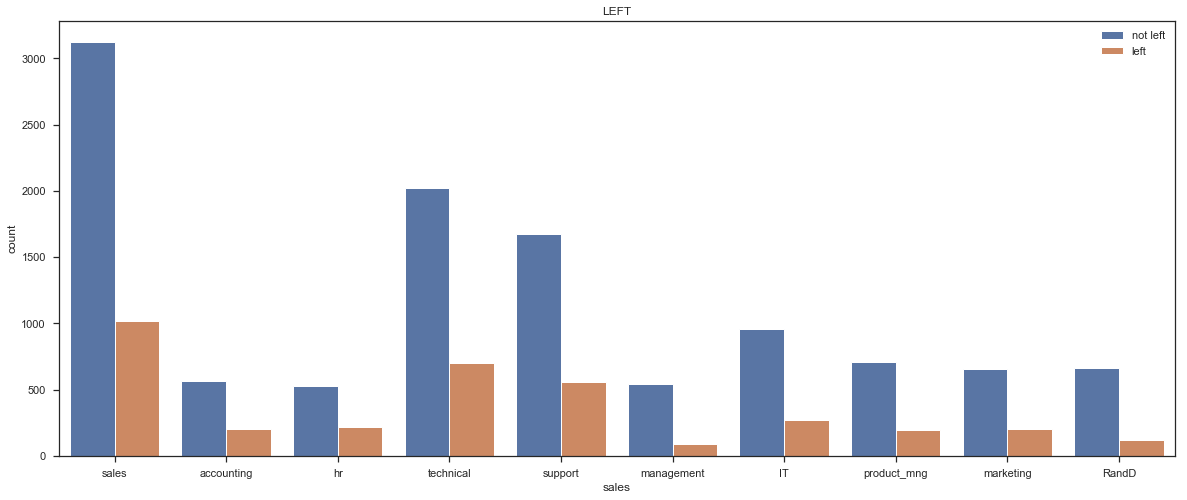

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(x="sales", hue='left', data=df);
plt.title('LEFT')
plt.legend(['not left', 'left'])
plt.show()

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

На основе результатов проведенных T-test-ов было выявлено, что выборки ушедших и оставшихся в компании сотрудников по показателю уровень удовлетворенности имеют статистическое отличие между собой. Также имеют статистическое различие выборки по группам зарплат. В частности выборка группы заработной платы (по показателю уровень удовлетворенности) low имеет статистическое различие между выборками high и medium. Выборки high и medium, схожее распределение и принимают нулевую гипотезу между собой.

На основании вышеизложенного следует рассмотреть гипотезу, что основной причиной ухода сотрудников из компании является снижение уровня удовлетворенности (satisfaction_level).

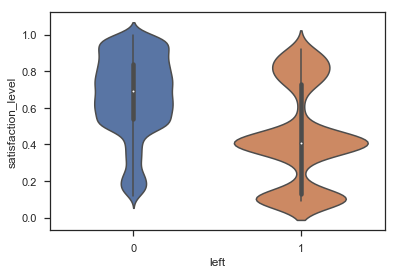

In [49]:
sns.violinplot(x='left', y='satisfaction_level', data=df);

Среднее значение left:  0.4400980117614114
Среднее значение not left:  0.6668095904795239
Медиана left:  0.41
Медиана not left:  0.69
Мода left:  0.1
Мода not left:  0.5


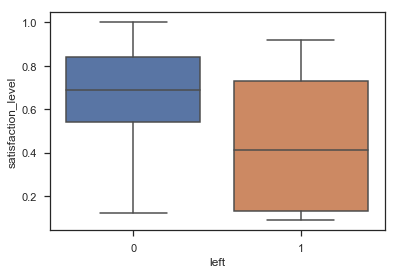

In [50]:
sns.boxplot(x='left', y='satisfaction_level', data=df);

print('Среднее значение left: ', statistics.mean(df[df['left']==1]['satisfaction_level']))
print('Среднее значение not left: ', statistics.mean(df[df['left']==0]['satisfaction_level']))
print('Медиана left: ', statistics.median(df[df['left']==1]['satisfaction_level']))
print('Медиана not left: ', statistics.median(df[df['left']==0]['satisfaction_level']))
print('Мода left: ', statistics.mode(df[df['left']==1]['satisfaction_level']))
print('Мода not left: ', statistics.mode(df[df['left']==0]['satisfaction_level']))

По графикам можно увидеть, что значения попоказателя уровня удовлетворенности сотрудников оставшихся в компании в основном находятся в интервале от 0.50 и выше, ушедших из компании ниже значения 0.50. Среднее значение выборки сотрудников оставшихся в компании составляет 0.67, покинувших компанию 0.44 (медиана 0.69 и 0.41 соотвественно). Верхнее значение Q3 процентиля выборки сотрудников покинувших компанию, расположено приблизительно на уровне значения медианы выборки оставшихся в компании сотрудников.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


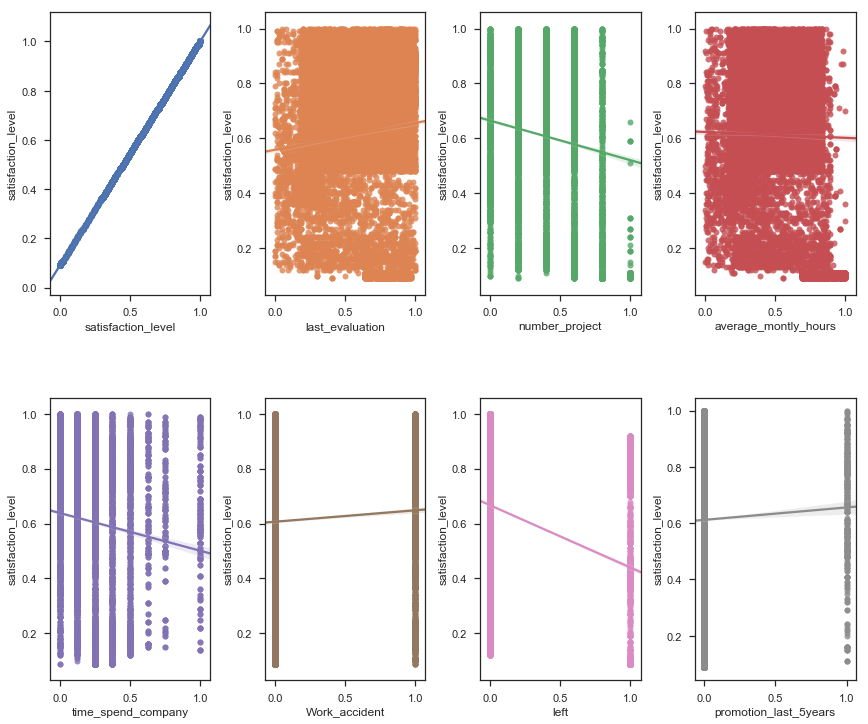

In [51]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
x = df.loc[:,column_sels]
y = df['satisfaction_level']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Наблюдения:

Линейная зависимость от переменной left. 
Есть также более слабая линейная зависисмость от переменных time_spend_company и  number_project.
Отмечается смещение количества сотрудников оставшихся и ушедших из компании, в зависимости от уровня удовлетворенности.

In [52]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [53]:
from sklearn.linear_model import LinearRegression
lstat = x['left']
medv = df['satisfaction_level']
model = LinearRegression()
result = model.fit(np.array(lstat).reshape(-1,1), medv)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.6668095904795238
slope: [-0.32707567]


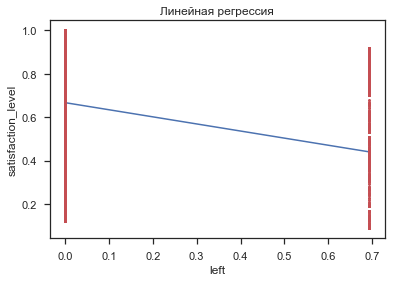

In [54]:
plt.xlabel('left')
plt.ylabel('satisfaction_level')
plt.title('Линейная регрессия')
x = np.linspace(min(lstat), max(lstat), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(lstat, medv, 'r.')
plt.show()